In [1]:
%load_ext autoreload
%autoreload 2

from petra import make_catalog_mv_normal
from petra import PosteriorChain

import numpy as np
import matplotlib.pyplot as plt

# Petra catalogs example

## Read in the global fit posterior

In [2]:
posterior_chain = PosteriorChain.read_feather('./lisa_example.feather')

## Make a catalog from the posterior

In [3]:
relabeled_chain = make_catalog_mv_normal(posterior_chain, posterior_chain.num_sources, initialization_param_index=0)

Initializing with univariate normal distribution.

Sorting the posterior chain:
	Maximum number of iterations: 200
	Maximum number of source labels:20

Iteration 1: Difference in cost of assignment is -114.30878114092232 with total cost of -114.30878114092232.
	Probabilities in model: [0.535  0.3075 0.01   0.99   0.784  0.192  0.99   0.136  0.99   0.99
 0.99   0.99   0.99   0.2145 0.043  0.8425 0.99   0.99   0.99   0.563 ]
Iteration 2: Difference in cost of assignment is -44.60358922109273 with total cost of -158.91237036201505.
	Probabilities in model: [0.5205 0.8995 0.037  0.5835 0.99   0.2495 0.99   0.121  0.6035 0.99
 0.99   0.99   0.99   0.3225 0.06   0.791  0.99   0.99   0.99   0.4375]
Iteration 3: Difference in cost of assignment is -20.97256864002628 with total cost of -179.88493900204134.
	Probabilities in model: [0.4815 0.8745 0.0475 0.568  0.99   0.2715 0.99   0.129  0.6825 0.99
 0.99   0.99   0.99   0.336  0.1735 0.7685 0.99   0.99   0.99   0.293 ]
Iteration 4: Difference i

Text(0, 0.5, 'Astrophysical probability')

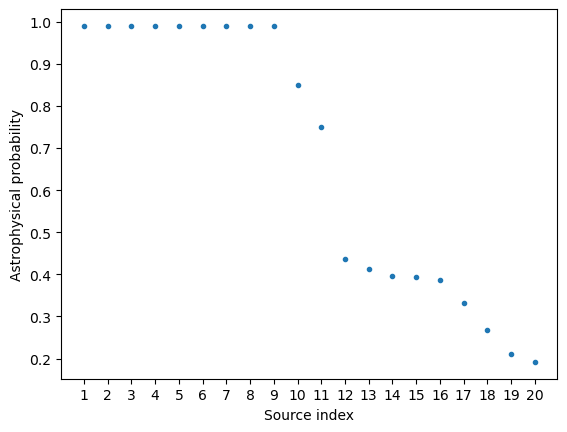

In [7]:
plt.plot(range(1, 21), sorted(relabeled_chain.prob_in_model, reverse=True), '.')
plt.xticks(range(1, 21), range(1, 21))
plt.xlabel('Source index')
plt.ylabel('Astrophysical probability')

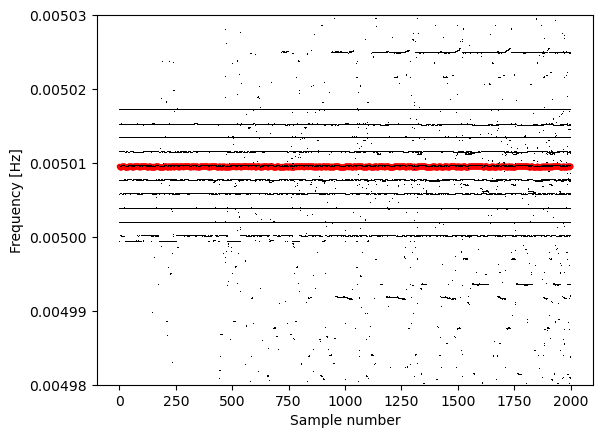

In [ ]:
# highlight the samples in red associated with this catalog source
result_index = 9  # 5th catalog source
plt.plot(relabeled_chain.chain[:, result_index, 0], 'r.')

for i in range(posterior_chain.chain.shape[1]):
    plt.plot(posterior_chain.chain[:, i, 0], 'k,')

plt.xlabel('Sample number')
plt.ylabel('Frequency [Hz]')
plt.ylim(0.00498, 0.00503)
plt.show()
